In [79]:
import plotly as py
import plotly.graph_objs as go
from numpy import array, linspace, polyfit
from pandas import read_csv
from collections import Counter
from sklearn.linear_model import LinearRegression as LR
from matplotlib.pyplot import scatter, show, legend, figure, plot
from matplotlib.style import use

#To use ployly offline
py.offline.init_notebook_mode(connected=True)

In [83]:
from collections import Counter




years = []
months = []
states = []
days = []
ages = []
killed_count = 0
injured_count = 0

print("Calculating the required data...")

for i in range(length):
    #Get The Gun Violence Data By Years
#     dates = data["date"][i]
#     year = dates[0:4]
    years.append(df.['year'])
    
    #Get The Gun Violence Data By Month
#     dates = data["date"][i]
#     month = dates[5:7]
    months.append(df.['month'])
    
    #Get The Gun Violence Count In States
#     all_states = data["state"][i]
    states.append(df.state)
    
    #Get The Count Of Killed People And Injured People 
#     each_killed = data["n_killed"][i]
    killed_count = killed_count + each_killed
    each_injured = data["n_injured"][i]
    injured_count = injured_count + each_injured
    
    #Get The Each Gun Violence Data 
    all_days = data["date"][i]
    day = int(all_days[8:10])
    days.append(day)
    
print("Calculation completed!")



array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

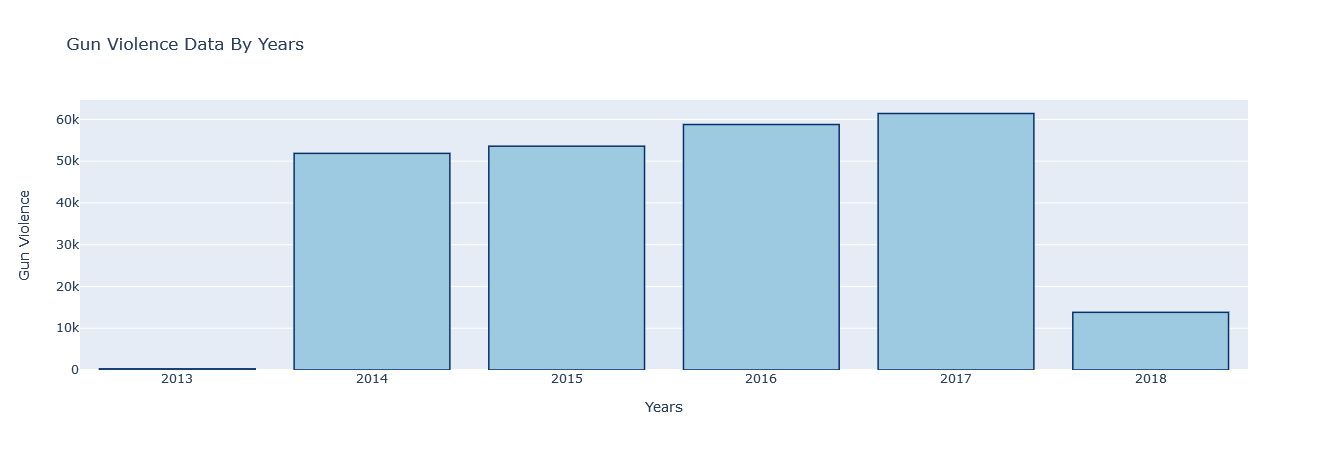

In [89]:
# C = Counter(years)

# each_years = list(C.keys())
gun_violence_count_of_year = df['year'].value_counts().sort_index()

layout = {
    'title' : 'Gun Violence Data By Years',
    'xaxis' : {
        'title' : 'Years',
    },
    'yaxis' : {
        'title' : 'Gun Violence',
    },
}

trace = go.Bar(
    x = each_years,
    y = gun_violence_count_of_year,
    marker = dict(
      color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )  
    ),
)

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

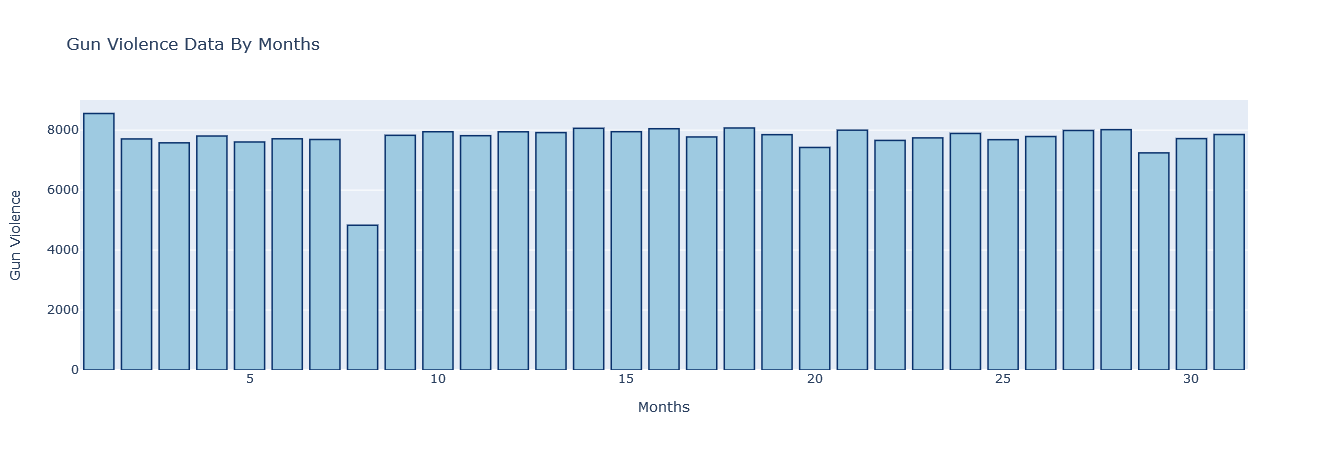

In [114]:
# each_month = list(C.keys())
gun_violence_count_of_month = df['monthday'].value_counts().sort_index().values

layout = {
    'title' : 'Gun Violence Data By Months',
    'xaxis' : {
        'title' : 'Months',
    },
    'yaxis' : {
        'title' : 'Gun Violence',
    },
}

trace = go.Bar(
    x = df.monthday.unique(),
    y = gun_violence_count_of_month,
    marker = dict(
      color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )  
    ),
)

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

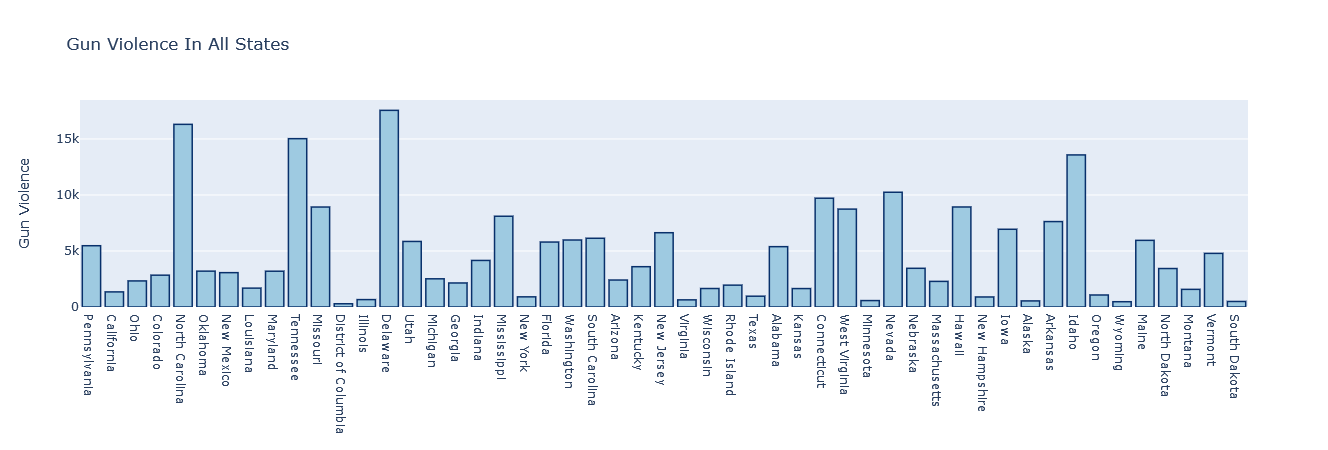

In [97]:
each_states = list(C.keys())
gun_violence_count_in_state = df.monthday.unique()

layout = {
    'title' : 'Gun Violence In All States',
    'yaxis' : {
        'title' : 'Gun Violence',
    },
}

trace = go.Bar(
    x = df.state.unique(),
    y = gun_violence_count_in_state,
    marker = dict(
      color = 'rgb(158,202,225)',
        line = dict(
            color = 'rgb(8,48,107)',
            width = 1.5,
        )  
    ),
)

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 85 columns):
incident_id                   239677 non-null int64
date                          239677 non-null datetime64[ns]
state                         239677 non-null object
city_or_county                239677 non-null object
address                       239677 non-null object
n_killed                      239677 non-null int64
n_injured                     239677 non-null int64
congressional_district        239677 non-null float64
gun_stolen                    239677 non-null object
gun_type                      239677 non-null object
incident_characteristics      239677 non-null object
latitude                      239677 non-null object
location_description          239677 non-null object
longitude                     239677 non-null object
n_guns_involved               239677 non-null object
participant_age               239677 non-null object
participant_age_group         23967

In [111]:
# C = Counter(days)

each_days = df.monthday.unique()
gun_violence_count_by_days = df['monthday'].value_counts().sort_index().values
gun_violence_count_by_days

array([8555, 7605, 7688, 7849, 7999, 7742, 7682, 7787, 7707, 7577, 7827,
       7815, 7945, 7657, 7890, 7804, 7947, 7918, 8061, 8047, 7773, 7718,
       7854, 7712, 8072, 7989, 8016, 7949, 7422, 7242, 4828], dtype=int64)

In [113]:
#C = Counter(days)

each_days = df.monthday.unique()
gun_violence_count_by_days = df['monthday'].value_counts().sort_index().values

each_days = np.array(each_days)
gun_violence_count_by_days = np.array(gun_violence_count_by_days)

s = len(each_days)

each_days = each_days.reshape(s,1)
gun_violence_count_by_days = gun_violence_count_by_days.reshape(s,1)

#linear line drawing and optimal placement
lineerR = LR()
lineerR.fit(each_days,gun_violence_count_by_days)
lineerR.predict(each_days)

#slope calculation
slope = float(lineerR.coef_)
#The intersection point of y for x = 0
interSec = float(lineerR.intercept_)

#finding the lowest and highest values to show the data on the plot
j = sorted(each_days)
#etc. linspace(lowest, highest, frequency)
theta = linspace(j[0], j[s-1], j[0]*j[s-1]*2)

fig = figure(figsize=(18, 9))
use('ggplot')
scatter(
    each_days, 
    gun_violence_count_by_days,
    color="r",
    label="input data")
plot(
    theta, 
    theta * slope + interSec,
    color="b", )
legend()
show()

TypeError: object of type <class 'numpy.ndarray'> cannot be safely interpreted as an integer.

In [75]:

C = Counter(days)

each_days = list(C.keys())
gun_violence_count_by_days = list(C.values())
